In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # separate train_set and test_set efficiently
import numpy as np
from sklearn import tree
import graphviz
# use this line of code if graphviz output error: conda install python-graphviz
from sklearn.metrics import accuracy_score as acc_rate
import os
import matplotlib.pyplot as plt

In [2]:
# set random seed for reproduction
SEED = 5225 

# set 1/3 of all observations to be test_set
TEST_SIZE = 1/3.0 

In [3]:
# get file path from current working dir
file_path = os.getcwd() + '\\p2p.csv' 
data = pd.read_csv(file_path, index_col=0)

# extract label info
label = data.status   
data.index = range(data.shape[0])

# delete duplicated column 'status' since it contains label info
del data['status'] 

In [4]:
# inpect data
data # a total of 15045 rows * 24 columns

,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,...,ratio030,DIO,DPO,DSO,turnover,nace,ratio036,ratio037,ratio039,ratio040
0,-0.238174,-0.155186,-0.124784,-0.422984,-0.441998,-0.281685,-0.476657,-3.467956,-3.405227,-1.297426,...,-0.301233,-0.297901,-0.462928,-0.722769,-0.381662,4635,1,1,1,1
1,-0.758472,-0.356497,-0.659060,-0.076745,0.260873,-0.515998,-1.119889,1.754630,0.921839,4.328932,...,-0.643458,-0.317154,-0.279493,-0.198444,4.591706,4791,1,1,1,1
2,-0.333616,-0.207378,0.508892,-0.263181,-0.496910,-0.276421,-0.372174,-0.547247,-0.088445,1.102322,...,-0.263208,-0.224098,-0.268703,-0.603186,0.408384,4752,1,1,1,1
3,-0.444811,-0.478278,-1.056660,0.145204,-0.255298,-0.239247,-0.424368,-3.467956,0.064050,1.449654,...,-0.529383,-0.166338,-0.398186,-0.685974,0.094786,4771,1,1,1,1
4,-0.479096,-0.523014,-1.156061,-0.902393,-0.749504,-0.371168,-0.400809,1.754630,-0.107507,0.039276,...,-2.924961,-0.320363,-0.160800,0.638637,0.040900,3212,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15040,-0.575464,3.977709,-0.808160,-0.627177,-0.409051,4.064475,-0.206591,1.754630,-3.405227,-0.055451,...,0.915568,-0.320363,0.939808,0.105113,-0.385891,9609,0,0,1,0
15041,-0.073699,-0.309276,-0.311159,-0.343083,-0.947187,-0.262275,-0.257444,0.041605,0.121236,-1.297426,...,-2.924961,5.007857,-0.732685,-0.796358,-0.387134,4711,0,0,1,0
15042,-0.229371,-0.309276,-0.137209,-0.138890,0.194979,-0.224771,-0.217221,-0.011927,0.197484,-1.181649,...,0.839518,-0.320363,-0.732685,-0.796358,-0.387360,4120,0,0,1,0
15043,-0.383654,-0.309276,4.616107,-1.142098,4.730694,4.064475,-0.284929,-0.279587,0.064050,-1.223750,...,-2.924961,-0.320363,1.101662,5.252333,-0.387247,8800,1,1,1,1


In [5]:
# inspect default/non-default label
label.value_counts() # '1(0)' for (non-)default

0    13413
1     1632
Name: status, dtype: int64

In [6]:
# separate train_data and test_data
X_train, X_test, y_train, y_test = train_test_split(
                                     data, label, test_size=TEST_SIZE, random_state=SEED)

In [7]:
X_train

,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,...,ratio030,DIO,DPO,DSO,turnover,nace,ratio036,ratio037,ratio039,ratio040
771,-0.475852,-0.530470,-1.180911,-0.964539,-1.057011,-0.380050,-0.336452,1.754630,0.921839,0.565536,...,2.702745,-0.076491,-0.452137,-0.741166,-0.281735,3299,1,1,1,1
9161,0.237183,-0.309276,-0.410559,-0.485130,-0.233333,-0.286291,-0.258785,0.041605,0.073581,-0.865893,...,0.117042,-0.320363,-0.732685,-0.796358,-0.288852,8559,0,0,1,1
11693,-0.190916,-0.309276,-0.211759,0.233983,-0.277263,0.161781,-0.249304,-0.011927,0.140298,-0.413308,...,-0.149133,0.321406,-0.732685,0.408670,-0.330424,1310,0,0,1,0
7910,-0.273849,-0.309276,-0.012959,0.109692,-0.496910,-0.515998,-0.252464,-0.065459,0.121236,-0.287006,...,-0.225183,0.343868,-0.732685,0.390273,-0.254962,4673,0,0,1,0
6072,-1.368040,3.977709,-0.460259,-0.378595,-0.101545,-0.272803,-0.253230,0.202201,0.540600,1.060222,...,-0.149133,-0.320363,-0.214751,0.463862,-0.171705,2222,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,-0.373461,-0.309276,4.616107,-1.142098,4.730694,-0.184636,-0.177956,-0.118991,0.111705,-0.392258,...,-0.187158,-0.313945,0.141328,0.509856,-0.381662,2363,0,0,0,0
14443,-1.368040,-0.309276,-0.534810,-0.360839,-0.079580,-0.249774,-0.285312,-0.065459,-3.405227,-1.055347,...,-0.491358,-0.320363,-0.732685,-0.796358,-0.338106,8299,1,1,0,1
4525,-0.359098,-0.309276,1.304094,0.997486,1.600721,-0.515998,-1.119889,-3.467956,0.597785,0.786566,...,0.497293,-0.320363,-0.732685,0.068319,-0.020554,4641,0,0,0,0
6628,0.849216,-0.309276,-0.447834,0.100814,-0.716557,-0.196808,-0.257827,0.041605,0.073581,-0.023876,...,-0.149133,0.257229,-0.732685,-0.318027,-0.203900,4752,0,0,1,1


In [8]:
X_test

,ratio001,ratio002,ratio003,ratio004,ratio005,ratio006,ratio008,ratio011,ratio012,ratio017,...,ratio030,DIO,DPO,DSO,turnover,nace,ratio036,ratio037,ratio039,ratio040
270,-1.368040,-1.040260,-0.584510,-0.485130,-0.903257,-0.373471,-0.382421,1.754630,-3.405227,1.091797,...,-0.757534,0.013357,-0.128429,-0.538795,0.026441,4511,1,1,1,1
3387,-0.190453,-0.043346,-0.211759,-0.289815,-0.277263,-0.260630,-0.233310,0.148669,0.226077,-0.497510,...,0.002967,-0.034776,1.587224,1.466520,0.254296,4672,0,0,1,0
561,0.152860,-0.132818,-0.385709,-0.733712,-0.540840,-0.304714,-0.262328,-0.065459,0.025927,-0.844842,...,-0.073083,-0.307527,1.651966,5.252333,-0.187859,3900,0,1,1,1
6133,4.180308,3.977709,-0.460259,0.020913,-0.035651,-0.191873,-0.249399,0.309265,-3.405227,-0.118602,...,0.079017,-0.082908,-0.333444,0.951393,-0.175433,2562,0,0,1,0
4281,-0.351685,-0.284423,0.968618,0.136326,0.425608,-0.259643,-1.119889,0.362797,0.235608,-1.297426,...,-0.149133,-0.307527,-0.484508,-0.603186,0.023390,4730,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,-0.240954,0.192759,-0.112359,-0.050111,0.304802,-0.259972,-0.239056,0.362797,0.283263,-0.287006,...,0.307168,-0.320363,-0.430557,0.574247,-0.256882,5224,0,0,1,0
10804,-0.265973,-0.309276,-0.037809,-0.058989,0.260873,-0.108641,-0.176041,0.309265,0.245139,-0.034401,...,0.079017,-0.301110,-0.732685,-0.796358,-0.318111,1812,0,0,1,0
11875,0.144984,0.620235,-0.385709,-0.165524,-1.111922,-0.515998,-0.289718,-0.279587,-0.326720,-0.771166,...,-0.415308,5.007857,-0.732685,-0.787160,-0.332797,4765,1,1,1,1
8652,-0.071846,-0.309276,-0.311159,-0.023477,0.337749,-0.242536,-0.239056,0.416329,0.168891,-0.118602,...,0.155067,-0.320363,-0.732685,-0.796358,-0.276426,7739,0,0,1,0


In [9]:
# extract feature name and class name to be displayed on tree plots
feature_names_p2p = X_train.columns
class_name_p2p = ['non-default','default']

In [10]:
### IF THIS CODE BLOCK RUNS WITH ERROR, PLEASE CHECK THE FIRST BLOCK ###

# create a clf object with entropy method with default setting
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  splitter='best',
                                  )

clf.fit(X=X_train, y=y_train)

print('\nAccuracy rate is:\n', round(acc_rate(y_test, clf.predict(X_test))*100,2),'%')

dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_names_p2p,
                                class_names=class_name_p2p,
                                filled=True,
                                rounded=True,
                                impurity=False,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("p2p decision tree - default", view = True)

# note that this plot will be too large to be displayed fully
# some parameters need adjustments


Accuracy rate is:
 86.66 %


'p2p decision tree - default.pdf'

In [11]:
# note that clf object can be generated with a series of different arguments, refer to this link and try different set of parameters:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# below are parameters that have significant effect on the tree model
# max_features: the number of features to consider when looking for the best split, default = n_features
# min_samples_split: the minimum number of samples required to split an internal node, default = 2
# min_samples_leaf: the minimum number of samples required to be at a leaf node, default = 1

# create a list of values for parameter min_samples_split to see their effects
min_samples_split_array = [2**i for i in range(6,11)]

# get decision tree plot with different values for splitting samples
# this for loop will create several different tree plots in the current working dir
for i in range(len(min_samples_split_array)):
                       
    n = min_samples_split_array[i]
    
    # create a clf object with entropy method
    clf = tree.DecisionTreeClassifier(criterion='entropy',
                                      splitter='best',
                                      min_samples_split=n
                                      )
    
    clf.fit(X=X_train, y=y_train)
    
    print('\nAccuracy rate for min_samples_split = {} is:\n'.format(n), round(acc_rate(y_test, clf.predict(X_test))*100,2), '%')
    
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    feature_names=feature_names_p2p,
                                    class_names=class_name_p2p,
                                    filled=True,
                                    rounded=True,
                                    impurity=False,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("p2p decision tree - min_sample = {}".format(n), view = True)


Accuracy rate for min_samples_split = 64 is:
 89.57 %

Accuracy rate for min_samples_split = 128 is:
 90.43 %

Accuracy rate for min_samples_split = 256 is:
 90.27 %

Accuracy rate for min_samples_split = 512 is:
 90.45 %

Accuracy rate for min_samples_split = 1024 is:
 90.59 %


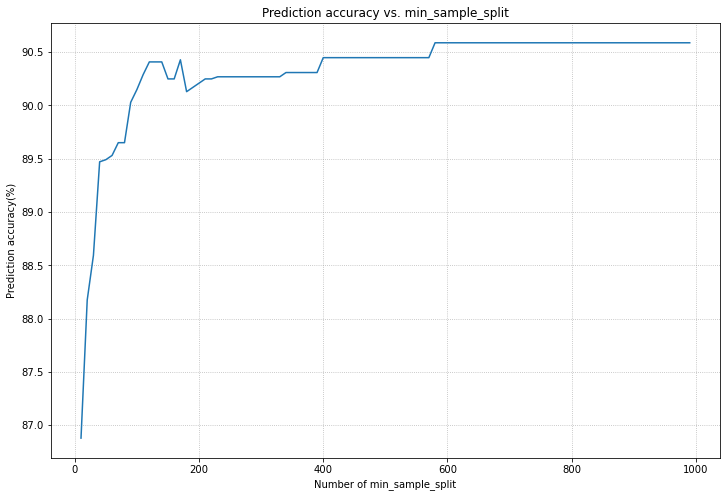

In [12]:
#  create a line chart of the accuracy vs. number of min_sample_split
min_samples_split_array = [i for i in range(10,1000,10)]
accuracy = []
for i in range(len(min_samples_split_array)):
                       
    n = min_samples_split_array[i]
    clf = tree.DecisionTreeClassifier(criterion='entropy',
                                      splitter='best',
                                      min_samples_split=n
                                      )
    
    clf.fit(X=X_train, y=y_train)
    
    accuracy.append(acc_rate(y_test, clf.predict(X_test))*100)

# creating line chart with matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.plot(min_samples_split_array, accuracy)
ax.grid(ls=':', color='gray', alpha=0.6)
plt.xlabel("Number of min_sample_split")
plt.ylabel("Prediction accuracy(%)")
_ = ax.set_title('Prediction accuracy vs. min_sample_split')